# Seaborn Basics


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The goal of this exercise is to analyze restaurant's invoices and tips.

In [2]:
df = sns.load_dataset('tips')

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1. Counting number of datapoints
---

❓ **On which day of the week are there more reservations at the restaurant?**
- Show this with a Seaborn "Countplot"
- Arrange days in week order
- Don't use rainbow colors

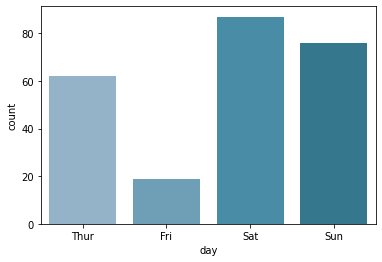

In [7]:
with sns.color_palette("PuBuGn_d"):
    sns.countplot(data = df, x = "day", order = ["Thur", "Fri", "Sat", "Sun"])

<AxesSubplot:xlabel='day', ylabel='count'>

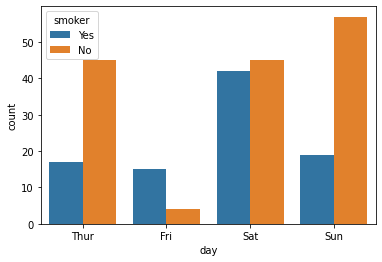

In [8]:
sns.countplot(data = df, x = "day", order = ["Thur", "Fri", "Sat", "Sun"],  hue ="smoker")

---

❓ Add a second breakdown with (`sex`, `smoker` or `time`) on top of the `day` dimension in a visually meaningful manner

In [ ]:
# Your plot here


## 2. Plotting distributions of numeric values

Let's now analyse the `tips` values.

### 2.1 Simple distribution

❓ Plot a histogram with seaborn and try out different number of `bins`. Try to overlay the powerful kernel density estimator `kde` on top of the histogram

<AxesSubplot:xlabel='tip', ylabel='Count'>

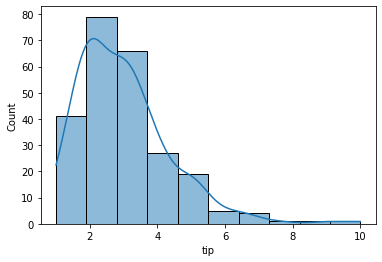

In [11]:
sns.histplot(df.tip, bins=10, kde = True)

### 2.1 Multiple distribution, same ax

❓ Try to reproduce the graph below, and make sure to understand the different `kinds` of catplots (`"bar"`, `"box"`, `"violin"`, `"boxen"`)

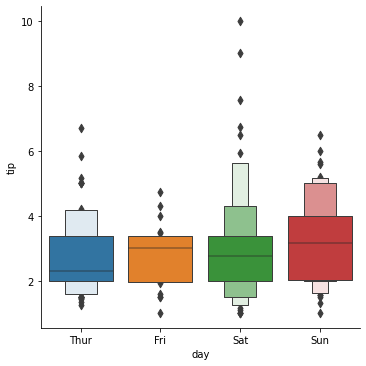

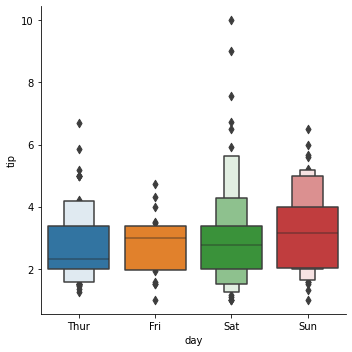

In [17]:
sns.catplot(data = df, x= "day", y= "tip", kind = "boxen")

### 2.2 FacetGrid of distributions

❓ Let's look into the powerful [`seaborn.FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

1. Run the cell below. What do you observe?
2. Change `plt.hist` inside `g.map` to another plotting function (like `sns.histplot` with `kde=True`, or even a bi-variate function like `sns.scatterplot`). Make sure to understand how this works!

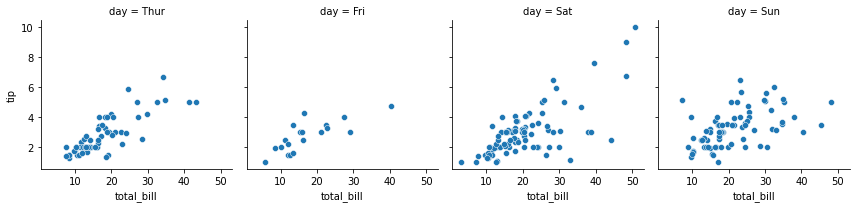

In [24]:
g = sns.FacetGrid(df, col="day")
g.map(sns.scatterplot, 'total_bill', "tip");

---
❓ Let's add a `row="smoker"` and `hue="smoker"` parameter. 

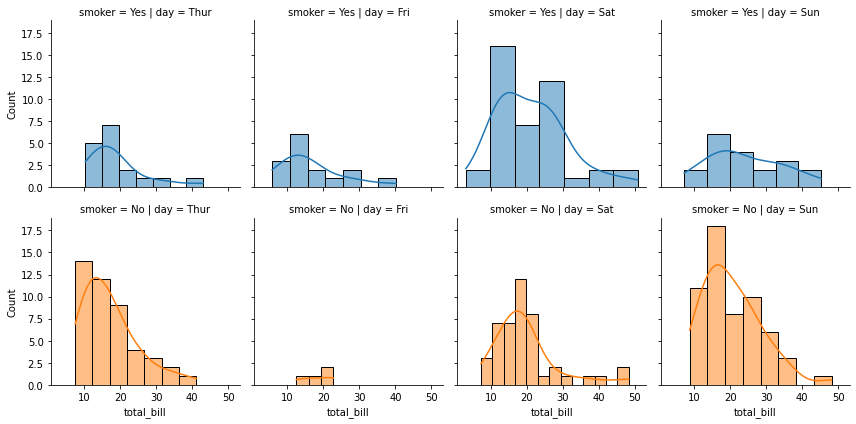

In [26]:
g = sns.FacetGrid(df, col="day", row="smoker", hue='smoker')
g.map(sns.histplot, "total_bill", kde=True);

## Correlations

Let's start looking for correlation between  `tip` and `total_bill`


❓ First, *regress `tip`on `total_bill`* (scatterplot of `tips` on y-axis versus `total_bill` on x)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

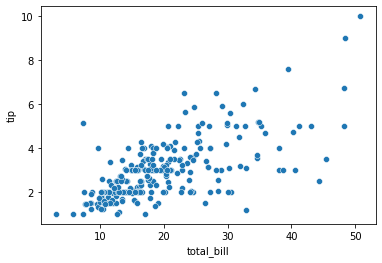

In [28]:
sns.scatterplot(data = df, x = "total_bill", y = "tip")

---
❓ Another beautiful way of looking at this data is to use the [`seaborn.jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

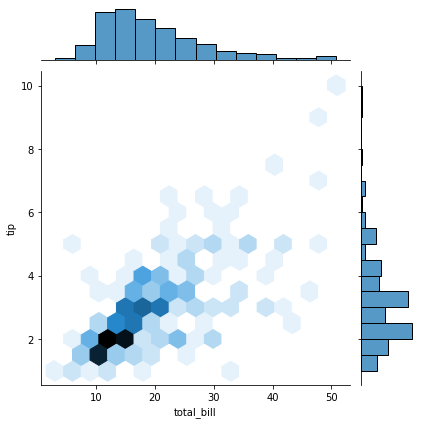

In [30]:
sns.jointplot(x = "total_bill", y="tip", data = df, kind = "hex")

❓ Let's now compute a simple linear regression curve using `sns.regplot()`

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

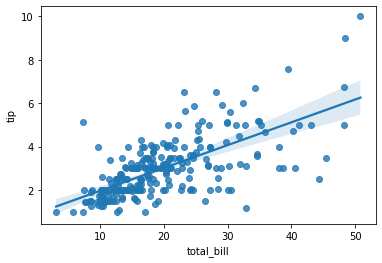

In [31]:
sns.regplot(x = "total_bill", y="tip", data = df)

❓Now, try also to use a `FacetGrid` to plot two regplots (one for smokers only, one for non-smokers). What conclusion can you draw?

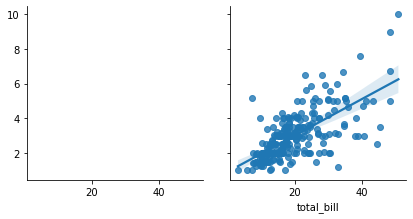

In [34]:
sns.FacetGrid(df, col= "smoker")
sns.regplot(x = "total_bill", y="tip", data = df);

## DataFrame-wide analysis with pairplot

❓ A very useful tool to identify **all correlations between all pairs of dataframe's columns** is the [`seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html):

In [ ]:
# Your plot here
